In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


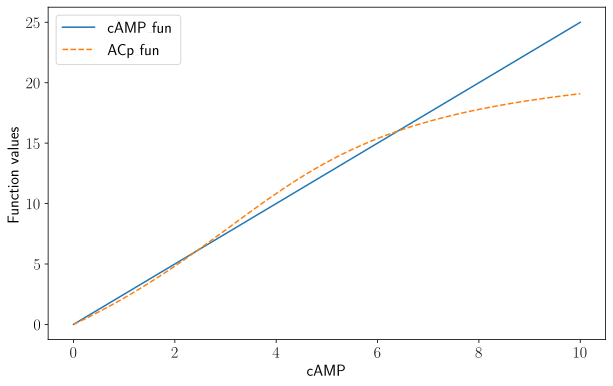

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# define the parameters
k1, k3, k2 = 2.64, 2.5, 1.57
r1, r2, r3, r4 = 4.94, 6.49, 0.88, 3.85
Km1, Km2, Km3, Km4 = 2.79, 6.11, 4.19, 1.38
Dt, ACt =  4.69, 8.63
PDEt, Et = 6.31, 6.12

def G(u, v, J, K): # equation (4)
    numerator = 2 * u * K # numerator of the fraction
    den_1 = v - u + v * J + u * K # first part of the denominator
    den_2 = -4 * (v - u) * u * K # second part of the denominator
    radicand = den_1**2 + den_2 # expression under the square root
    denominator = den_1 + np.sqrt(radicand) # compute the entire denominator
    return numerator / denominator # compute and return the fraction

cAMP = np.linspace(0, 10, 100)  # create a range of cAMP values

cAMP_fun = k3 * cAMP  # compute cAMP_fun for all cAMP values
ACp_fun = k1 * ACt * G(r1 * cAMP, r2 * Dt, Km1 / ACt, Km2 / ACt)  # compute ACp_fun for all cAMP values

# create the plot
plt.figure(figsize=(10, 6))
plt.plot(cAMP, cAMP_fun, label='cAMP_fun')
plt.plot(cAMP, ACp_fun, label='ACp_fun', linestyle='--')
plt.xlabel('cAMP')
plt.ylabel('Function values')
plt.legend()
plt.show()
